Importing Libraries


In [1]:
import numpy as np 
import pandas as pd 

import os

import matplotlib.pylab as plt
import seaborn as sns

import librosa
import librosa.display

import librosa.effects as le
import IPython.display as ipd

Load the Dataset


In [2]:
Tess = "/kaggle/input/speech-emotion-recognition-en/Tess"
tess_directory_list = os.listdir(Tess)


labels = []
paths = []

for dir in tess_directory_list:
    directories = os.listdir(Tess +'/'+ dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[-1]
        if(part=="ps"):
           labels.append("surprise")
        else:
           labels.append(part)
        paths.append(Tess +'/'+ dir + '/' + file)

       
# dataframe for emotion of files
emotion_df = pd.DataFrame(labels, columns=['Emotions'])
path_df = pd.DataFrame(paths, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()


,Emotions,Path
0,fear,/kaggle/input/speech-emotion-recognition-en/Te...
1,fear,/kaggle/input/speech-emotion-recognition-en/Te...
2,fear,/kaggle/input/speech-emotion-recognition-en/Te...
3,fear,/kaggle/input/speech-emotion-recognition-en/Te...
4,fear,/kaggle/input/speech-emotion-recognition-en/Te...


In [3]:
paths[0]

'/kaggle/input/speech-emotion-recognition-en/Tess/YAF_fear/YAF_home_fear.wav'

In [4]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [5]:
df = pd.DataFrame();
df['speech'] = paths
df['label'] = labels
df.tail()

,speech,label
2795,/kaggle/input/speech-emotion-recognition-en/Te...,surprise
2796,/kaggle/input/speech-emotion-recognition-en/Te...,surprise
2797,/kaggle/input/speech-emotion-recognition-en/Te...,surprise
2798,/kaggle/input/speech-emotion-recognition-en/Te...,surprise
2799,/kaggle/input/speech-emotion-recognition-en/Te...,surprise


In [6]:
# df['label'].value_counts()
df['speech']

0       /kaggle/input/speech-emotion-recognition-en/Te...
1       /kaggle/input/speech-emotion-recognition-en/Te...
2       /kaggle/input/speech-emotion-recognition-en/Te...
3       /kaggle/input/speech-emotion-recognition-en/Te...
4       /kaggle/input/speech-emotion-recognition-en/Te...
                              ...                        
2795    /kaggle/input/speech-emotion-recognition-en/Te...
2796    /kaggle/input/speech-emotion-recognition-en/Te...
2797    /kaggle/input/speech-emotion-recognition-en/Te...
2798    /kaggle/input/speech-emotion-recognition-en/Te...
2799    /kaggle/input/speech-emotion-recognition-en/Te...
Name: speech, Length: 2800, dtype: object

Counting the labels

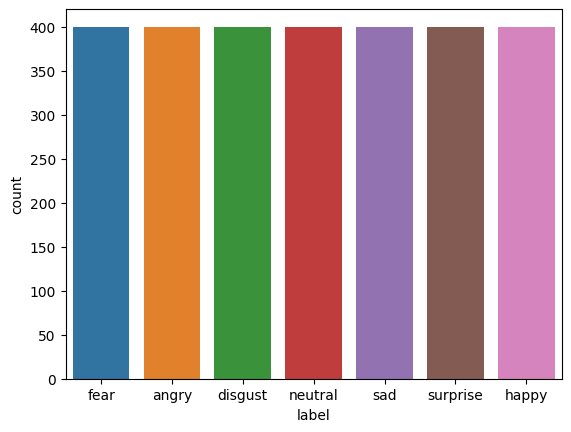

In [7]:
sns.countplot(data=df, x='label')
plt.show()

**plotting waveform**

In [8]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

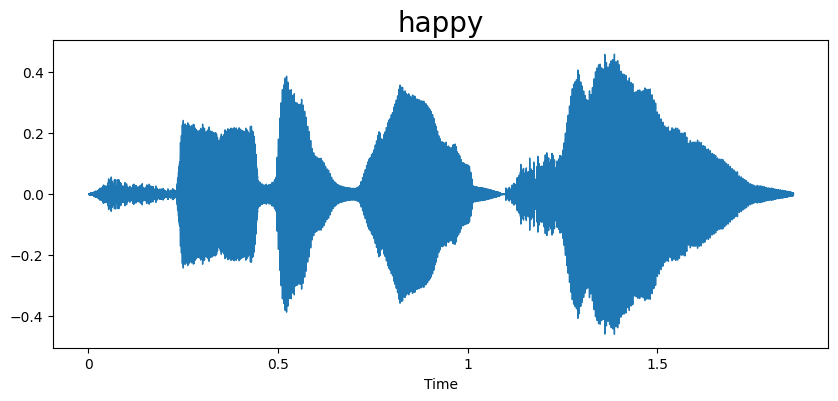

In [9]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
waveplot(data,sr,emotion)

plotting spectogram

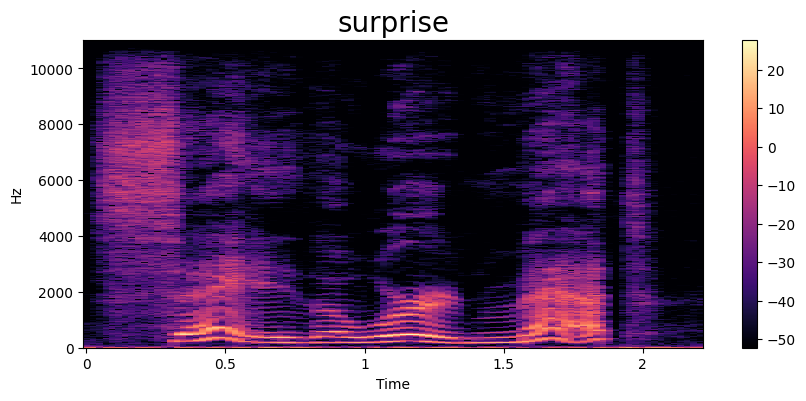

In [10]:
def spectogram(data,sr,emotion):
   x = librosa.stft(data)
   xdb = librosa.amplitude_to_db(abs(x))
   plt.figure(figsize=(10,4))
   plt.title(emotion,size=20)
   librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
   plt.colorbar()
emotion = 'surprise'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
spectogram(data,sr,emotion)

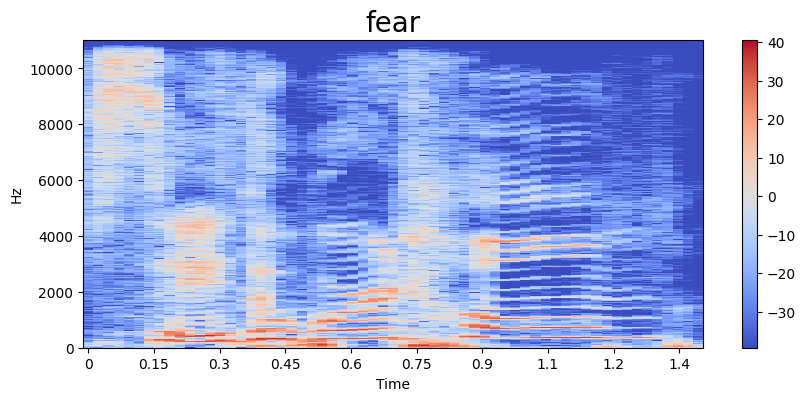

In [11]:
def spectogram(data,sr,emotion):
   x = librosa.stft(data)
   xdb = librosa.amplitude_to_db(abs(x))
   plt.figure(figsize=(10,4))
   plt.title(emotion,size=20)
   librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
   plt.colorbar()
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
spectogram(data,sr,emotion)

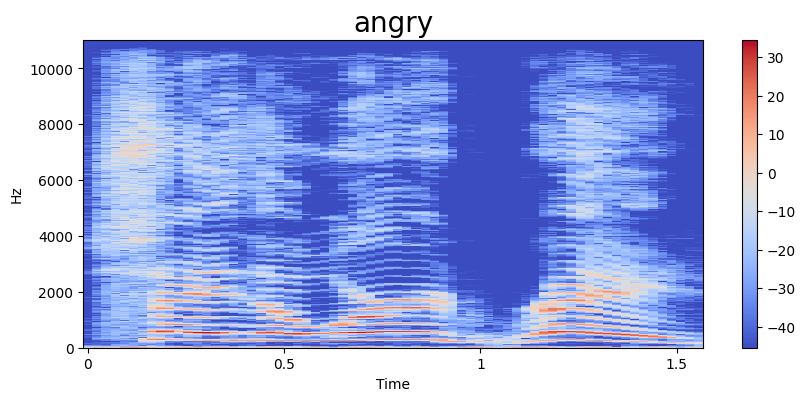

In [12]:
def spectogram(data,sr,emotion):
   x = librosa.stft(data)
   xdb = librosa.amplitude_to_db(abs(x))
   plt.figure(figsize=(10,4))
   plt.title(emotion,size=20)
   librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
   plt.colorbar()
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
spectogram(data,sr,emotion)

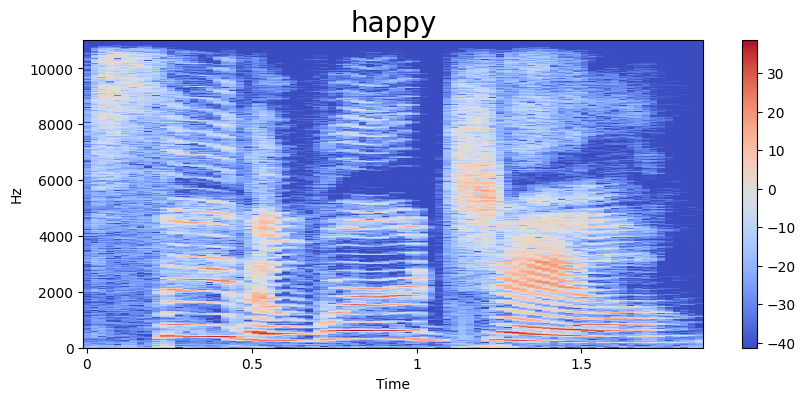

In [13]:
def spectogram(data,sr,emotion):
   x = librosa.stft(data)
   xdb = librosa.amplitude_to_db(abs(x))
   plt.figure(figsize=(10,4))
   plt.title(emotion,size=20)
   librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
   plt.colorbar()
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
spectogram(data,sr,emotion)

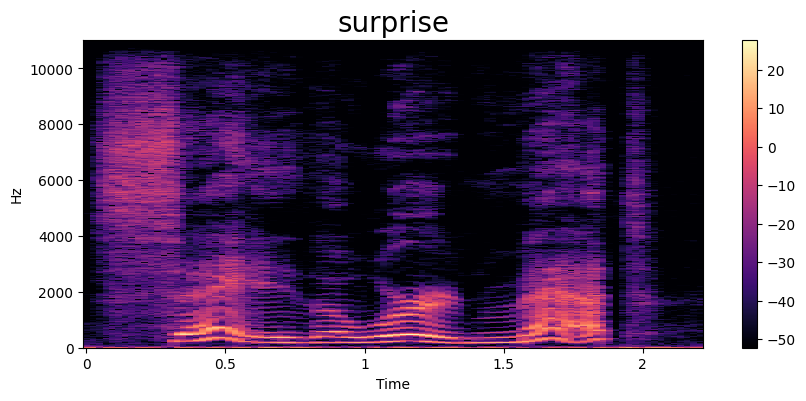

In [14]:
def spectogram(data,sr,emotion):
   x = librosa.stft(data)
   xdb = librosa.amplitude_to_db(abs(x))
   plt.figure(figsize=(10,4))
   plt.title(emotion,size=20)
   librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
   plt.colorbar()
emotion = 'surprise'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
spectogram(data,sr,emotion)

Feature Extraction

**FEATURE EXTRACTION MFCC**

In [15]:
def extract_mfcc(fn):
    y,sr = librosa.load(fn,duration=3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [16]:
extract_mfcc(paths[0])

array([-285.73727   ,   85.78295   ,   -2.1689112 ,   22.125532  ,
        -14.757395  ,   11.051346  ,   12.412449  ,   -3.0002618 ,
          1.0844991 ,   11.078272  ,  -17.41966   ,   -8.093213  ,
          6.5879726 ,   -4.2209535 ,   -9.15508   ,    3.52148   ,
        -13.186381  ,   14.078853  ,   19.66973   ,   22.725618  ,
         32.57464   ,   16.325035  ,   -3.8427293 ,    0.89629656,
        -11.239262  ,    6.653462  ,   -2.5883696 ,   -7.7140164 ,
        -10.941658  ,   -2.4007547 ,   -5.281288  ,    4.271157  ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.869744  ,
         -1.6027985 ,    2.5600514 ,   11.454374  ,   11.233449  ],
      dtype=float32)

In [17]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x
                                                  ))

In [18]:
x_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
2795    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
2796    [-313.96478, 39.847843, -5.6493053, -3.867575,...
2797    [-357.54886, 77.886055, -15.224756, 2.194633, ...
2798    [-353.1474, 101.68391, -14.175896, -12.037376,...
2799    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: speech, Length: 2800, dtype: object

In [19]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [20]:
# X = np.expand_dims(X,-1)
# X.shape

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [22]:
y = y.toarray()

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


**DATA MODELING AND PREDICTION , ACCURACY
**

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [24]:
history = model.fit(X,y,validation_split=0.2,epochs=200,batch_size=512,shuffle=True)

Epoch 1/200
5/5 [==============================] - 5s 341ms/step - loss: 1.8823 - accuracy: 0.2621 - val_loss: 2.0086 - val_accuracy: 0.0000e+00
Epoch 2/200
5/5 [==============================] - 1s 184ms/step - loss: 1.7297 - accuracy: 0.3272 - val_loss: 2.1416 - val_accuracy: 0.0000e+00
Epoch 3/200
5/5 [==============================] - 1s 183ms/step - loss: 1.5347 - accuracy: 0.3862 - val_loss: 2.3006 - val_accuracy: 0.0000e+00
Epoch 4/200
5/5 [==============================] - 1s 183ms/step - loss: 1.2728 - accuracy: 0.4969 - val_loss: 2.3732 - val_accuracy: 0.0000e+00
Epoch 5/200
5/5 [==============================] - 1s 181ms/step - loss: 1.0834 - accuracy: 0.6103 - val_loss: 2.4732 - val_accuracy: 0.0018
Epoch 6/200
5/5 [==============================] - 1s 183ms/step - loss: 0.8869 - accuracy: 0.7004 - val_loss: 2.4947 - val_accuracy: 0.0482
Epoch 7/200
5/5 [==============================] - 1s 187ms/step - loss: 0.7515 - accuracy: 0.7469 - val_loss: 2.5499 - val_accuracy: 0.08

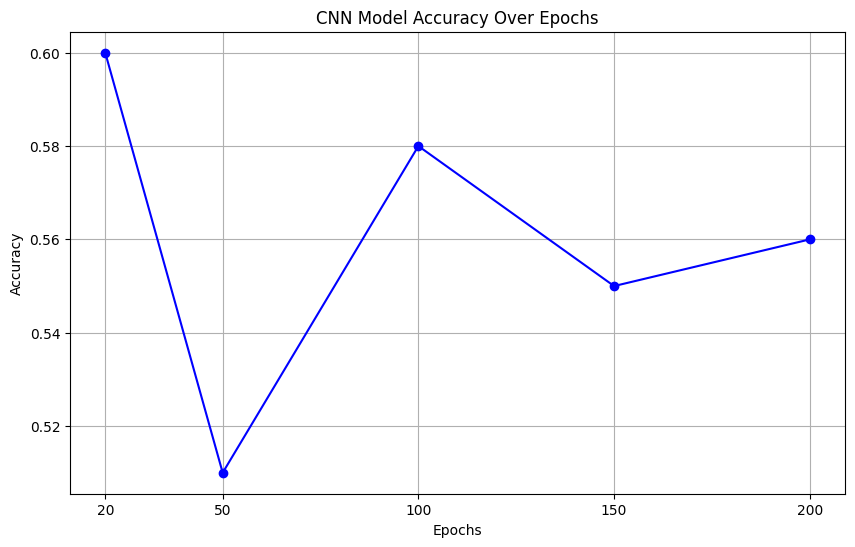

In [25]:
import matplotlib.pyplot as plt

# Sample accuracy values for LSTM model over epochs
epochs = [20,50, 100, 150, 200]
accuracy = [.60,.51,.58, .55, .56]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b')
plt.title('CNN Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid(True)
plt.show()


In [26]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1216)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                77888     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                      

In [27]:
history = model_cnn.fit(X,y,validation_split=0.2,epochs=150,batch_size=512,shuffle=True)

Epoch 1/150
5/5 [==============================] - 1s 79ms/step - loss: 5.2638 - accuracy: 0.1536 - val_loss: 2.8542 - val_accuracy: 0.0000e+00
Epoch 2/150
5/5 [==============================] - 0s 26ms/step - loss: 2.2355 - accuracy: 0.3277 - val_loss: 2.1349 - val_accuracy: 0.0000e+00
Epoch 3/150
5/5 [==============================] - 0s 26ms/step - loss: 1.7134 - accuracy: 0.3969 - val_loss: 2.0844 - val_accuracy: 0.0464
Epoch 4/150
5/5 [==============================] - 0s 25ms/step - loss: 1.3056 - accuracy: 0.5165 - val_loss: 2.6873 - val_accuracy: 0.0000e+00
Epoch 5/150
5/5 [==============================] - 0s 27ms/step - loss: 1.0218 - accuracy: 0.6143 - val_loss: 2.5186 - val_accuracy: 0.0089
Epoch 6/150
5/5 [==============================] - 0s 28ms/step - loss: 0.8397 - accuracy: 0.6848 - val_loss: 2.7312 - val_accuracy: 0.0393
Epoch 7/150
5/5 [==============================] - 0s 27ms/step - loss: 0.6961 - accuracy: 0.7375 - val_loss: 2.0386 - val_accuracy: 0.2339
Epoch 8/

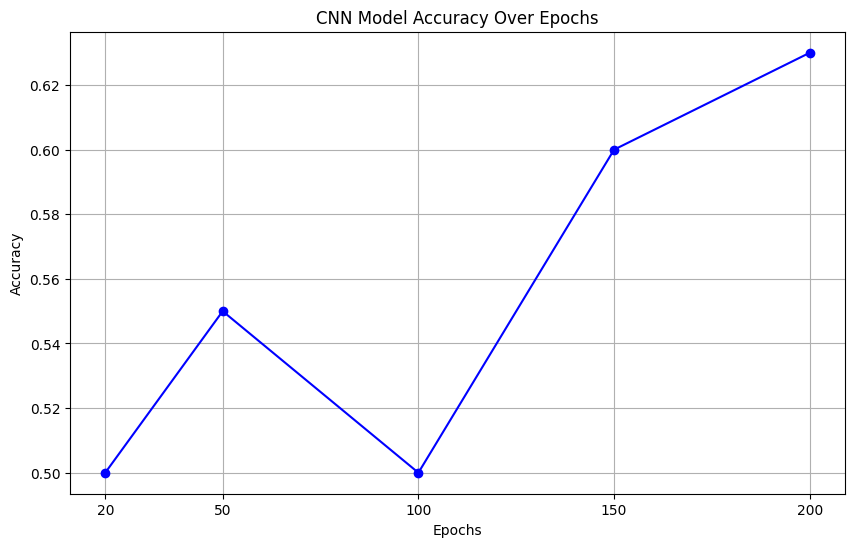

In [28]:
import matplotlib.pyplot as plt

# Sample accuracy values for LSTM model over epochs
epochs = [20, 50, 100, 150, 200]
accuracy = [.50, .55, .50, .60, .63]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b')
plt.title('CNN Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (100,) and (150,)

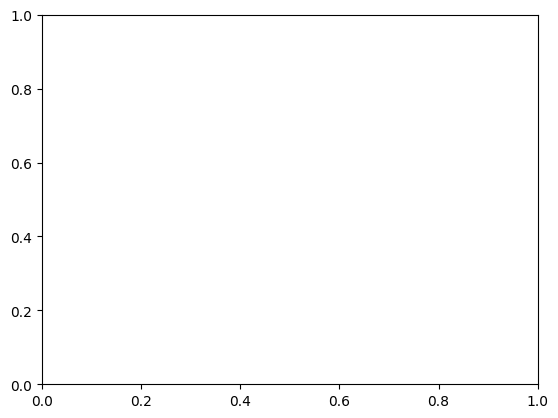

In [29]:
epochs = list(range(100))
loss = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,loss,label = 'accuracy')
plt.plot(epochs,val_acc,label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate a synthetic dataset for demonstration
# X, y = make_classification(n_samples=1000, n_features=40, n_informative=20, n_classes=7, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier with, for example, k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
# iris = load_iris()
# X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Test different values of k (number of neighbors)
for k in range(1, 150):
    # Create a KNN classifier with the current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy:.2f}")


In [ ]:
import matplotlib.pyplot as plt

# Different values of k for KNN
k_values = [20, 50, 100, 150, 200]

# Corresponding accuracy values for each k
accuracy_values = [.95, .97, .93,.95, .94]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='g')
plt.title('KNN Model Accuracy with Different Values of k')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Test different values of k (number of neighbors)
for k in range(1, 100):
    # Create a KNN classifier with the current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy:.2f}")

In [ ]:
import matplotlib.pyplot as plt

# Sample accuracy values for LSTM model over epochs
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy = [0.65, 0.72, 0.78, 0.81, 0.84, 0.86, 0.88, 0.89, 0.90, 0.91]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b')
plt.title('LSTM Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset for demonstration
# In a real-world scenario, you would replace this with your own dataset
# X, y = make_classification(n_samples=1000, n_features=40, n_informative=20, n_classes=7, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Generate random MFCCs for a single audio sample
random_mfcc = np.random.rand(40).reshape(1, -1)

# Standardize the random MFCC using the same scaler
random_mfcc_standardized = scaler.transform(random_mfcc)

# Predict the emotion label for the random MFCC
predicted_emotion = knn_classifier.predict(random_mfcc_standardized)

print(f"Predicted Emotion Label: {predicted_emotion[0]}")


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset for demonstration
# In a real-world scenario, you would replace this with your own dataset
# X, y = make_classification(n_samples=1000, n_features=40, n_informative=20, n_classes=7, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Generate random MFCCs for a single audio sample
random_mfcc = np.random.rand(40).reshape(1, -1)

# Standardize the random MFCC using the same scaler
random_mfcc_standardized = scaler.transform(random_mfcc)

# Predict the emotion label for the random MFCC
predicted_emotion = knn_classifier.predict(random_mfcc_standardized)

# Generate a random actual emotion label for demonstration
actual_emotion = np.random.randint(7)  # Assuming 7 different emotions

print(f"Actual Emotion Label: {actual_emotion}")
print(f"Predicted Emotion Label: {predicted_emotion[0]}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset for demonstration
# In a real-world scenario, you would replace this with your own dataset
# X, y = make_classification(n_samples=1000, n_features=40, n_informative=20, n_classes=7, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Generate 50 random MFCCs and predict their emotions
num_samples = 50
random_mfccs = np.random.rand(num_samples, 40)
random_mfccs_standardized = scaler.transform(random_mfccs)
predicted_emotions = knn_classifier.predict(random_mfccs_standardized)

# Generate random actual emotion labels for demonstration
actual_emotions = np.random.randint(7, size=num_samples)  # Assuming 7 different emotions

# Calculate accuracy percentage
accuracy_percentage = accuracy_score(actual_emotions, predicted_emotions) * 100

# Print actual and predicted emotions
print("Actual Emotion Labels:", actual_emotions)
print("Predicted Emotion Labels:", predicted_emotions)

# Print accuracy percentage
print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")

# Plot a bar graph of actual vs predicted emotions
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(num_samples)
bar1 = ax.bar(index, actual_emotions, bar_width, label='Actual Emotions')
bar2 = ax.bar(index + bar_width, predicted_emotions, bar_width, label='Predicted Emotions')

ax.set_xlabel('Sample Index')
ax.set_ylabel('Emotion Labels')
ax.set_title('Actual vs Predicted Emotions')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset for demonstration
# In a real-world scenario, you would replace this with your own dataset
# X, y = make_classification(n_samples=1000, n_features=40, n_informative=20, n_classes=7, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_standardized, y)

# Generate 50 random MFCCs and predict their emotions
num_samples = 20
random_mfccs = np.random.rand(num_samples, 40)
random_mfccs_standardized = scaler.transform(random_mfccs)
predicted_emotions = knn_classifier.predict(random_mfccs_standardized)

# Generate random actual emotion labels for demonstration
actual_emotions = np.random.randint(7, size=num_samples)  # Assuming 7 different emotions

# Calculate accuracy for each sample
accuracy_per_sample = [accuracy_score([actual], [predicted]) for actual, predicted in zip(actual_emotions, predicted_emotions)]

# Plot a bar graph of accuracy for each sample
fig, ax = plt.subplots()
index = np.arange(num_samples)
bar_width = 0.35

bars = ax.bar(index, accuracy_per_sample, bar_width, label='Accuracy per Sample')

ax.set_xlabel('Sample Index')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Each Sample')
ax.set_xticks(index)
ax.legend()

plt.show()


In [ ]:
history = knn_classifier.fit(X,y)